# Using Heuristics and Dynamic Programming to Solve the Class Scheduling Problem

In [35]:
import numpy as np
import random
import math
from course import *
import matplotlib.pyplot as plt

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, generate a toy data set

Greedy algorithM:
- schedule the class with the most demand first
- scheudle all the students and classes first, then assign the teachers.

Two ways to think about cost/optimal next choice:
- the class with the most studnets signed up for it (do this until every block fo the school day is full)
- the class with the least amount of students that would have a conflict with an existing, scheduled class
    - do this when choosing which class to place in a slot already occupied by another class to avoid conflicts as much as possible

Parameters:
 - N = 50 students, 2 grades
 - Each student takes six classes
 - N_t = 12 teachers. 2 teachers per subject

| Required Classes | Elective Classes |
|------------------|------------------|
| English          | Art              |
| Math             | History          |
| Science          | Computer Science |
| Language         |                  |

 - A school day consists of 7 blocks
 
| Block |
|-------|
|   A   |
|   B   |
|   C   |
|   D   |
|   E   |
|   F   |
|   G   |

## Initial Parameters

In [37]:
total_students = 100 # 100 students, 2 grades of 50 each
ideal_class_size = 11 # 10 students per class
total_teachers = 14 # two teachers for each subject
classes_per_teacher = 4 # 4 classes per teacher

## Generate Mock Data

In [38]:
english_courses = [
    Course("ENG10"),
    Course("ENG20"),]

math_courses = [
    Course("MATH10"),
    Course("MATH20"),]

science_courses = [
    Course("SCI10"),
    Course("SCI20"),]

history_courses = [
    Course("HIST10"),
    Course("HIST20"),]

language_courses = [
    Course("SPA10"),
    Course("SPA20"),]

art_courses = [
    Course("ART10"),
    Course("ART20"),]

computer_courses = [
    Course("COM10"),
    Course("COM20"),]

# Create a list of all courses
all_courses = english_courses + math_courses + science_courses + history_courses + art_courses + computer_courses + language_courses

Now for the students

In [39]:
students = []

# Create 100 students with random course selections
for i in range(total_students):
    eng = random.choice(english_courses)
    mat = random.choice(math_courses)
    sci = random.choice(science_courses)
    lan = random.choice(language_courses)    

    elective_courses = [art_courses, computer_courses, history_courses]

    sub1, sub2 = random.sample(elective_courses, 2) # Select 2 random elective courses
    elective1 = random.choice(sub1)
    elective2 = random.choice(sub2)
    student = Student(f"Student {i+1}", [eng, mat, sci, lan], [elective1, elective2])
    students.append(student)

Plot the data

In [40]:
course_frequencies = {course.name: 0 for course in all_courses}
for student in students:
    courses = student.get_all_courses()
    for course in courses:
        course_frequencies[course.name] += 1
print(course_frequencies)

{'ENG10': 46, 'ENG20': 54, 'MATH10': 56, 'MATH20': 44, 'SCI10': 50, 'SCI20': 50, 'HIST10': 34, 'HIST20': 32, 'ART10': 33, 'ART20': 36, 'COM10': 33, 'COM20': 32, 'SPA10': 53, 'SPA20': 47}


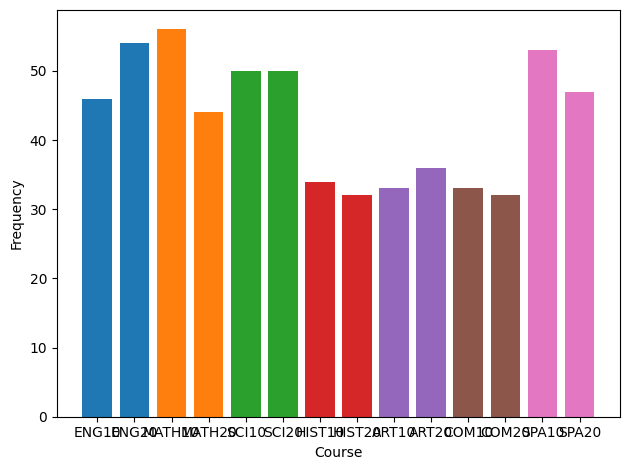

In [43]:
# create a histogram of the course frequencies for each subject
for i in range(0, len(all_courses), 2):
    plt.plot(4, 2, i+1)
    plt.bar([all_courses[i].name, all_courses[i+1].name], [course_frequencies[all_courses[i].name], course_frequencies[all_courses[i+1].name]])
    plt.xlabel('Course')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Zoomed in plot of just English

<BarContainer object of 2 artists>

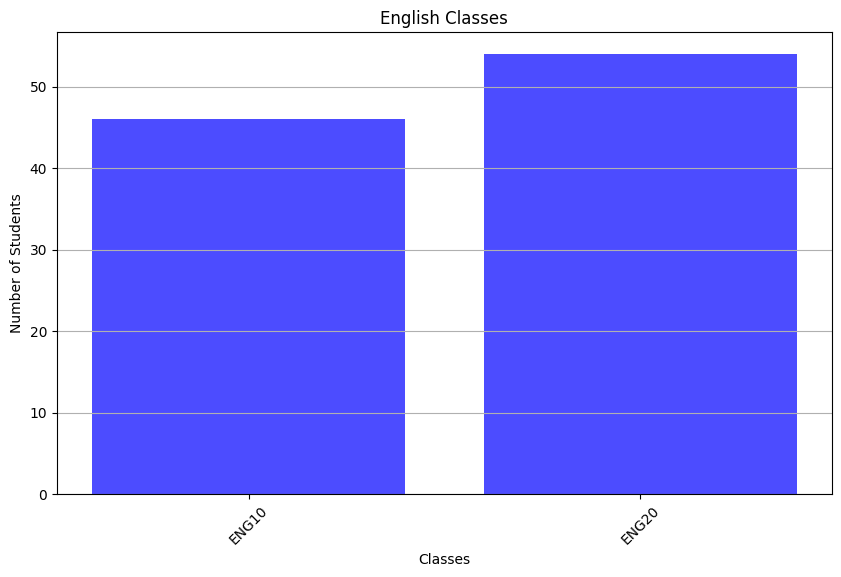

In [45]:
# plot the frequencies of each class for each subject
# english:
plt.figure(figsize=(10, 6))
plt.title("English Classes")
plt.xlabel("Classes")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.bar([english_courses[0].name, english_courses[1].name], [course_frequencies[english_courses[0].name], course_frequencies[english_courses[1].name]], color='blue', alpha=0.7)

Start with 1 subject. Then:

1. Assign the number of classes based on demand.

$n = \lceil \frac{\text{num students}}{\text{optimal class size}} \rceil$

2. Fix the classes within the school day.

3. Put students in classes based on student schedule

ENG20: 6 sections


TypeError: Course.__init__() got an unexpected keyword argument 'block'

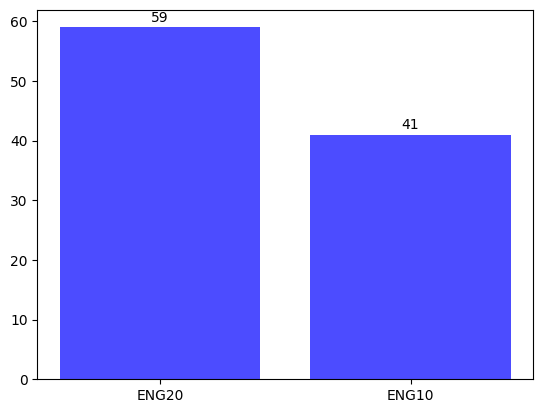

In [ ]:
# sort the classes by frequency
sorted_classes = sorted(english_classes, key=lambda x: course_frequencies[x], reverse=True)
for class_name in sorted_classes:
    plt.bar(class_name, course_frequencies[class_name], color='blue', alpha=0.7)
for i, class_name in enumerate(sorted_classes):
    plt.text(i, course_frequencies[class_name] + 0.5, str(course_frequencies[class_name]), ha='center', va='bottom')


for course in sorted_classes:
    num_sections = math.ceil(course_frequencies[course] / ideal_class_size)
    print(f"{course}: {num_sections} sections")

    # TODO: change from A block to alogirhmically generated block
    new_course = Course(course, block="A") # create a new course object.

Constraint: each teacher teaches at most 4 sections

Evaluating a position:
- cost-to-go. Come up with a way to evaluate a position based on the features of it. (how constrained it is)

Compare all permutations of courses in which blocks.


What is the algorithm for assigning students?
- take all of the students that have that block free. Pick a random sample of them to fill it up. Since elective sare placed last, this should prioritize filling the required courses.

## 3 possible methods to consider

### 1. student first (prioritize student elective satisfaction)
Go through each student, place each class based on their schedule. If a class already exists (and the capacity is less than maxium amount), assign the student to that class, otherwise open a new section.

### 2. teacher first (prioritize number of blocks that teachers will teach)
Assign teacher schedules based on their desired teaching schedule. (i.e. 4 sections even w/50 students because teachers prefer only 4)

### 3. class sizes (prioritize size of each class)
Assign the total number of sections for each course first. (i.e. 5 sections b/c 50 students)

***********

Methods 2 and 3 are similar because you assign the teacher schedules first, then place the students.